In [ ]:
# Install necessary libraries
!pip install transformers torch scikit-learn matplotlib

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


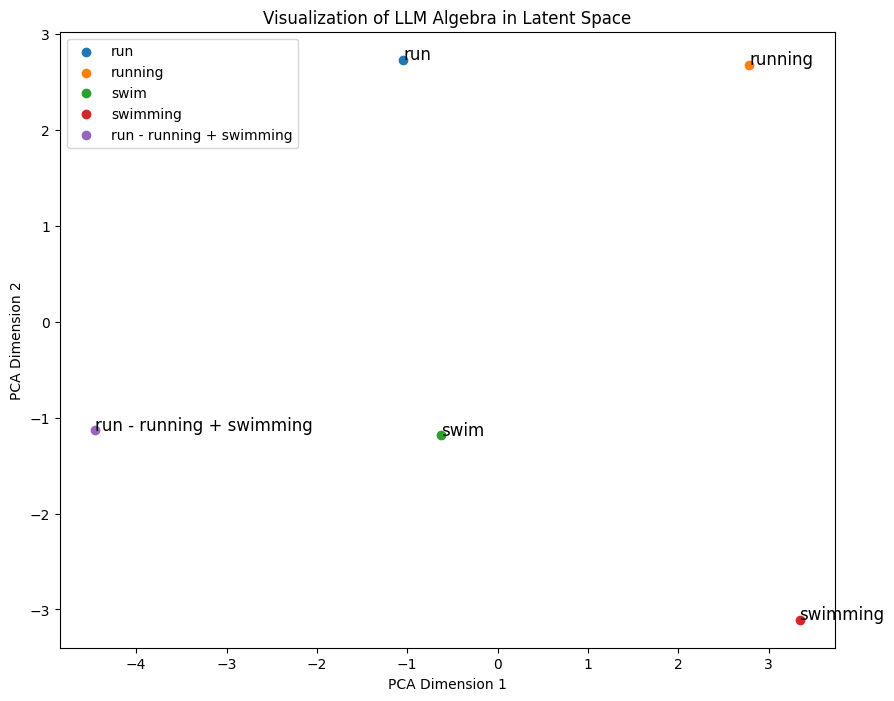

In [ ]:
# Import libraries
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Load a pre-trained transformer model (such as BERT or a similar model)
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

# Function to get embeddings for a word or phrase
def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    # Flatten the output to create a single vector for PCA
    return outputs.last_hidden_state.mean(dim=1).squeeze().detach().numpy()

# Sample words and algebraic expressions to visualize
words = ["run", "running", "swim", "swimming", "run - running + swimming"]

# Calculate embeddings
embeddings = [get_embedding(word) for word in words[:4]]
# Calculate "king - man + woman" manually
king, man, woman = embeddings[0], embeddings[1], embeddings[2]
queen_estimate = king - man + woman
embeddings.append(queen_estimate)

# Stack embeddings into a 2D array
embeddings = np.stack(embeddings)

# Perform dimensionality reduction for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot the embeddings
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], label=word)
    plt.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], word, fontsize=12)

plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("Visualization of LLM Algebra in Latent Space")
plt.legend()
plt.show()

Set of Words: Words representing countries, cities, and continents, combined with directional vectors.

Words: "Paris", "France", "Berlin", "Germany", "Europe", and the operation "Paris - France + Germany" to approximate "Berlin".
Set of Words: Family relationships, which often work well with simple arithmetic relationships.

Words: "brother", "sister", "man", "woman", and the operation "brother - man + woman" to approximate "sister".
Set of Words: Verb conjugations and tense shifts.

Words: "run", "running", "swim", "swimming", and the operation "run - running + swimming" to approximate "swim".
Set of Words: Comparisons between objects or abstract concepts.

Words: "hot", "cold", "summer", "winter", and the operation "hot - summer + winter" to approximate "cold".